# **Performing Prediction with EMR BOTS Data specifically Type I Diabetes and Interpreting Them**
*Logistic Regression ML

*SHAP (XAI)

In [1]:
# Load EDA Pkgs
import pandas as pd
import numpy as np

In [2]:
# Load ML Pkgs
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [3]:
# Load Viz Pkgs
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
# Load Dataset
df = pd.read_csv("diabetes-data.csv")

In [5]:
# Replace "Male" with 1 and "Female" with 0 under the "GENDER" column
df['GENDER'] = df['GENDER'].replace({'Male': 1, 'Female': 0})

In [6]:
df.head()

,PATIENT ID,GENDER,METABOLIC: GLUCOSE,BLOOD PRESSURE,SKIN THICKNESS,METABOLIC: INSULIN,BMI,TYPE I DIABETES PF,AGE,OUTCOME
0,3A3C2AFB-FFFA-4E69-B4E6-73C1245D5D12,1,148,72,35,0,33.6,0.627,50,1
1,801AFB51-036F-40E3-BDFE-FED4844BE275,1,85,66,29,0,26.6,0.351,31,0
2,366B0CC6-18AC-45DD-9AD4-BE884FE3A299,0,183,64,0,0,23.3,0.672,32,1
3,DBB78149-D86C-435E-82C4-341999FD0719,0,89,66,23,94,28.1,0.167,21,0
4,2C6269F4-71F8-4C07-A905-C08E9A3524C2,0,137,40,35,168,43.1,2.288,33,1


In [7]:
df.shape

(1000, 10)

In [8]:
# Check For Missing Values
df.isna().sum()

PATIENT ID            0
GENDER                0
METABOLIC: GLUCOSE    0
BLOOD PRESSURE        0
SKIN THICKNESS        0
METABOLIC: INSULIN    0
BMI                   0
TYPE I DIABETES PF    0
AGE                   0
OUTCOME               0
dtype: int64

In [9]:
# Data Types
df.dtypes

PATIENT ID             object
GENDER                  int64
METABOLIC: GLUCOSE      int64
BLOOD PRESSURE          int64
SKIN THICKNESS          int64
METABOLIC: INSULIN      int64
BMI                   float64
TYPE I DIABETES PF    float64
AGE                     int64
OUTCOME                 int64
dtype: object

In [10]:
# Check For Occurence of Outcome
df.groupby('OUTCOME').size()

OUTCOME
0    636
1    364
dtype: int64

<Axes: xlabel='OUTCOME'>

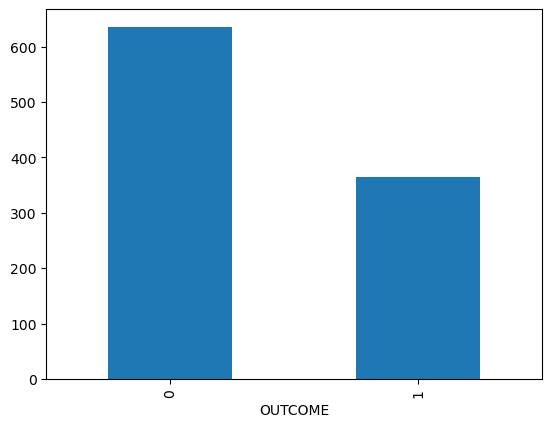

In [11]:
df.groupby('OUTCOME').size().plot(kind="bar")

In [12]:
# Check For Correlation Between Xtics/Features
corr = df.corr()

/var/folders/n6/mp8zcd6d73vbypyws28zmdw00000gn/T/ipykernel_11216/386352433.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<Axes: >

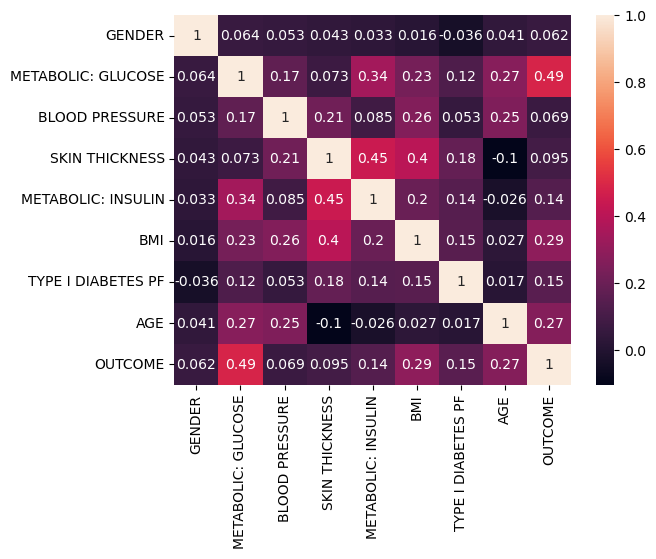

In [13]:
sns.heatmap(corr,annot=True)

# Data Viz of Entire Dataset

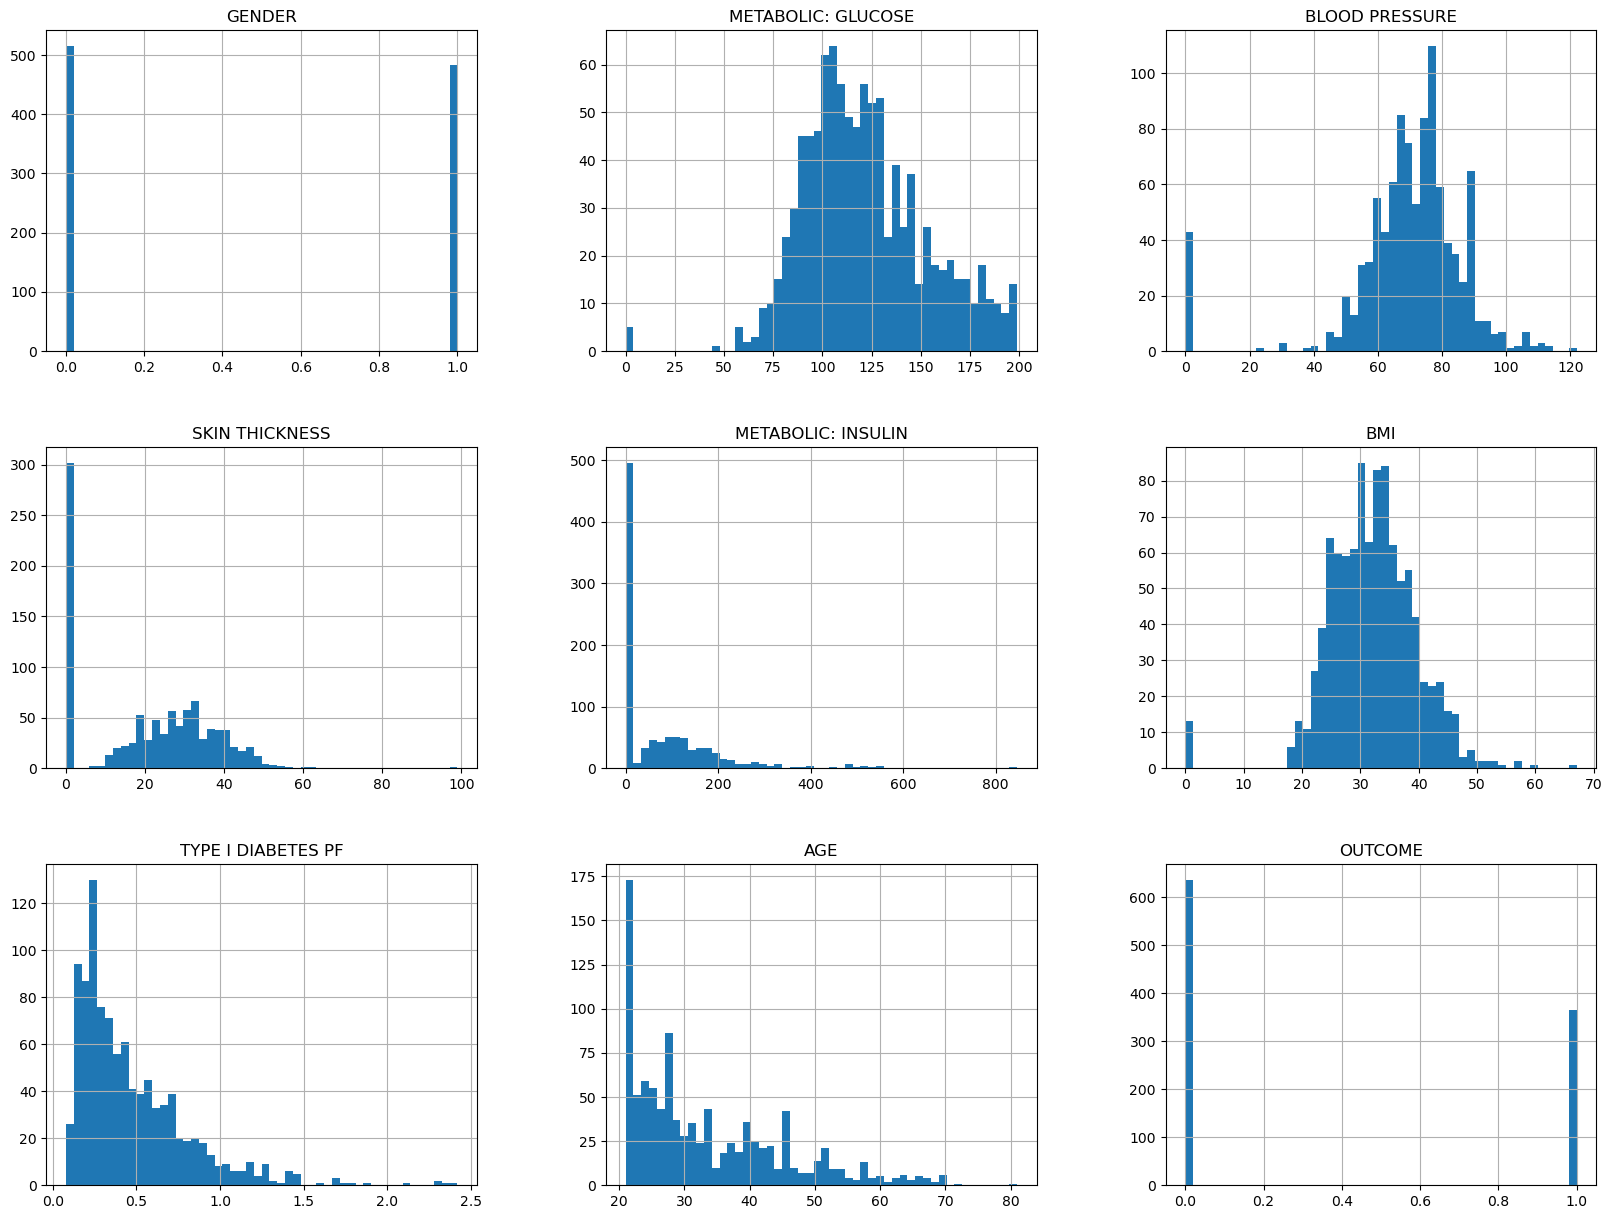

In [14]:
df.hist(bins=50, figsize=(20, 15))
plt.show()

In [15]:
# Descriptive Analysis Transposed
df.describe().T

,count,mean,std,min,25%,50%,75%,max
GENDER,1000.0,0.484000,0.499994,0.000,0.000,0.0000,1.000,1.00
METABOLIC: GLUCOSE,1000.0,121.753000,31.516524,0.000,100.000,118.0000,140.250,199.00
BLOOD PRESSURE,1000.0,69.437000,19.130552,0.000,62.000,72.0000,80.000,122.00
SKIN THICKNESS,1000.0,20.629000,16.096847,0.000,0.000,23.0000,33.000,99.00
METABOLIC: INSULIN,1000.0,80.375000,117.009485,0.000,0.000,22.5000,127.250,846.00
BMI,1000.0,32.063500,7.715692,0.000,27.400,32.1500,36.600,67.10
TYPE I DIABETES PF,1000.0,0.472871,0.333795,0.078,0.238,0.3705,0.631,2.42
AGE,1000.0,33.381000,11.715421,21.000,24.000,29.0000,41.000,81.00
OUTCOME,1000.0,0.364000,0.481389,0.000,0.000,0.0000,1.000,1.00


### Data Cleaning

In [16]:
# Checking For Minimum In The columns
print('Glucose',df['METABOLIC: GLUCOSE'].min())
print('BP',df['BLOOD PRESSURE'].min())
print('ST', df['SKIN THICKNESS'].min())
print('BMI',df['BMI'].min())
print('Insuline', df['METABOLIC: INSULIN'].min())


Glucose 0
BP 0
ST 0
BMI 0.0
Insuline 0


In [17]:
# Replace 0 with Median not Mean
df['BLOOD PRESSURE'] = df['BLOOD PRESSURE'].replace(to_replace=0,value=df['BLOOD PRESSURE'].median())
df['METABOLIC: GLUCOSE'] = df['METABOLIC: GLUCOSE'].replace(to_replace=0,value=df['METABOLIC: GLUCOSE'].median())
df['SKIN THICKNESS'] = df['SKIN THICKNESS'].replace(to_replace=0,value=df['SKIN THICKNESS'].median())
df['BMI'] = df['BMI'].replace(to_replace=0,value=df['BMI'].median())
df['METABOLIC: INSULIN'] = df['METABOLIC: INSULIN'].replace(to_replace=0,value=df['METABOLIC: INSULIN'].median())

In [18]:
# Checking For Minimum In The columns (Again to be Sure)
print('Glucose',df['METABOLIC: GLUCOSE'].min())
print('BP',df['BLOOD PRESSURE'].min())
print('ST', df['SKIN THICKNESS'].min())
print('BMI',df['BMI'].min())
print('Insuline', df['METABOLIC: INSULIN'].min())

Glucose 44
BP 24
ST 7
BMI 18.2
Insuline 14.0


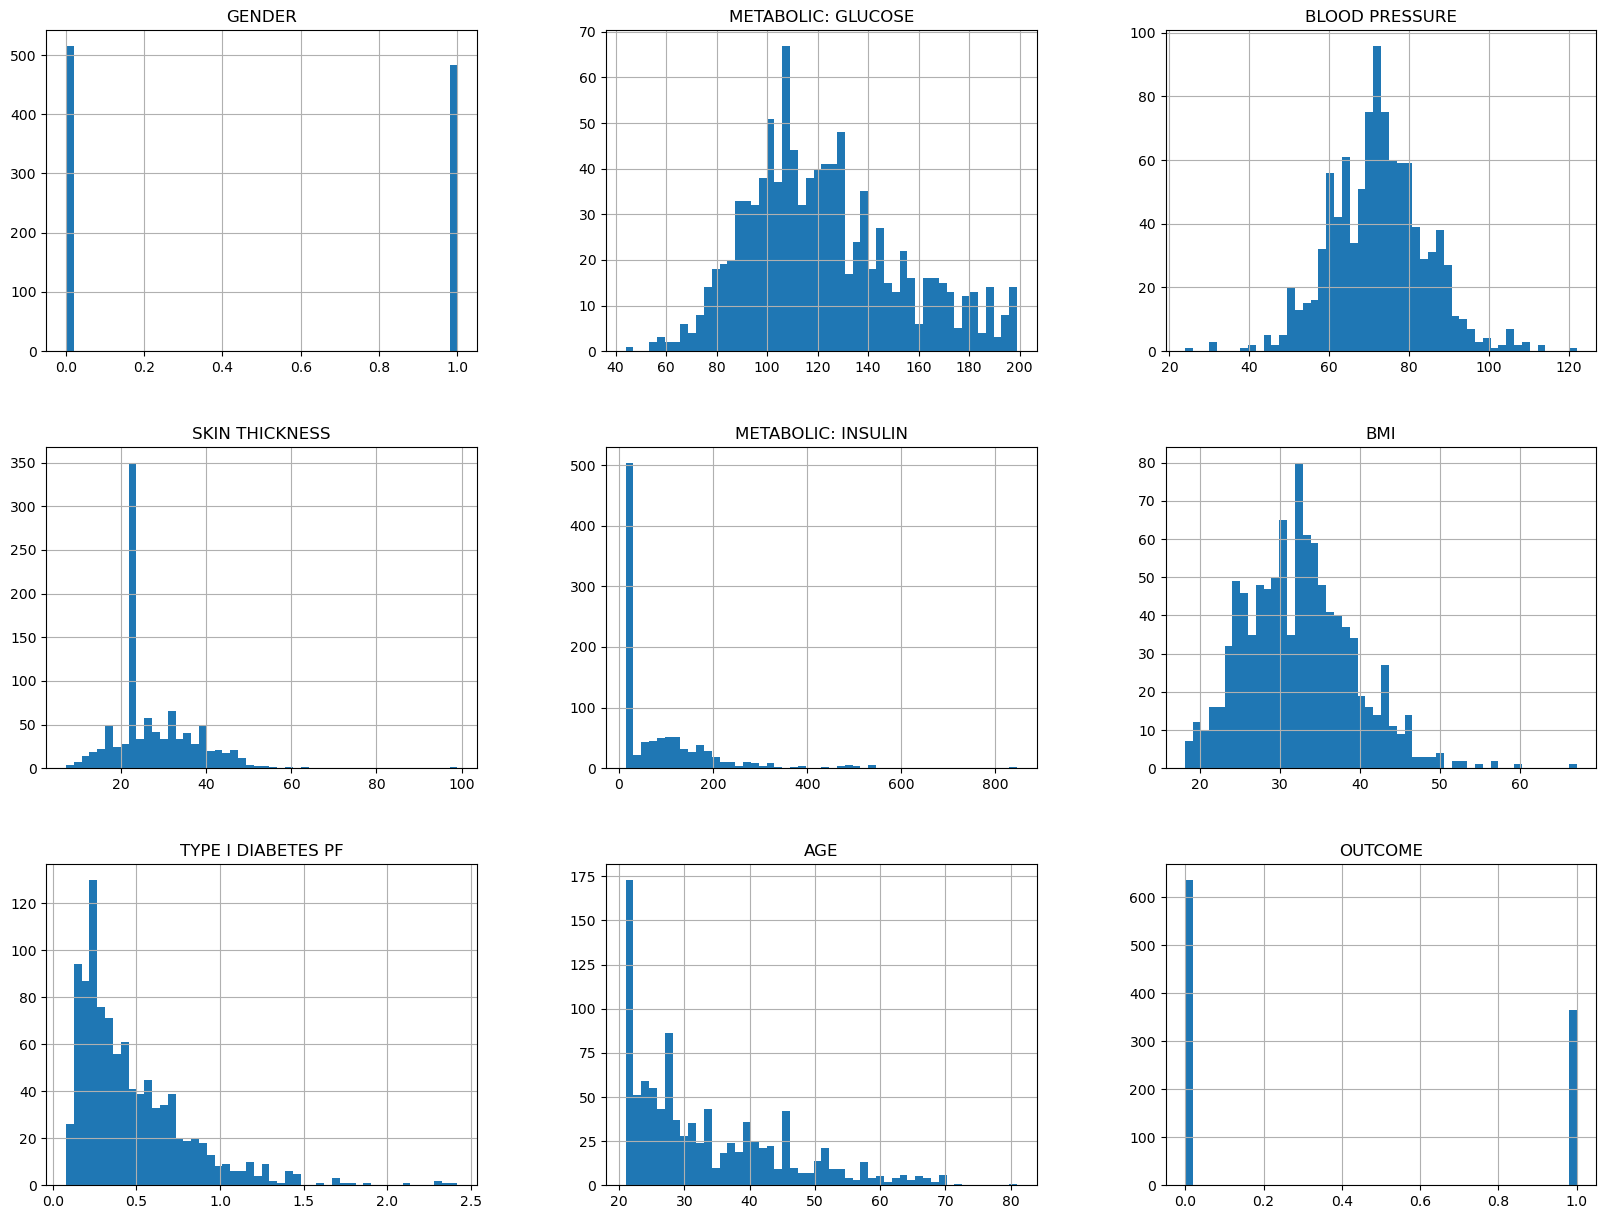

In [19]:
df.hist(bins=50, figsize=(20, 15))
plt.show()

Preparing Features for Testing and Training

In [20]:
df.columns

Index(['PATIENT ID', 'GENDER', 'METABOLIC: GLUCOSE', 'BLOOD PRESSURE',
       'SKIN THICKNESS', 'METABOLIC: INSULIN', 'BMI', 'TYPE I DIABETES PF',
       'AGE', 'OUTCOME'],
      dtype='object')

In [21]:
df.iloc[:,1:9]

,GENDER,METABOLIC: GLUCOSE,BLOOD PRESSURE,SKIN THICKNESS,METABOLIC: INSULIN,BMI,TYPE I DIABETES PF,AGE
0,1,148,72,35,22.5,33.6,0.627,50
1,1,85,66,29,22.5,26.6,0.351,31
2,0,183,64,23,22.5,23.3,0.672,32
3,0,89,66,23,94.0,28.1,0.167,21
4,0,137,40,35,168.0,43.1,2.288,33
...,...,...,...,...,...,...,...,...
995,0,98,58,33,190.0,34.0,0.430,43
996,0,154,78,30,100.0,30.9,0.164,45
997,0,165,68,26,168.0,33.6,0.631,49
998,0,99,58,10,22.5,25.4,0.551,21


In [22]:
Xfeatures = df.iloc[:,1:9]

In [23]:
Ylabels = df['OUTCOME']

In [24]:
Ylabels

0      1
1      0
2      1
3      0
4      1
      ..
995    0
996    0
997    0
998    0
999    1
Name: OUTCOME, Length: 1000, dtype: int64

Scale Dataset For ML

In [25]:
from sklearn.preprocessing import MinMaxScaler as Scaler

In [26]:
scaler = Scaler()
X = scaler.fit_transform(Xfeatures)

In [27]:
names = ['GENDER', 'METABOLIC: GLUCOSE', 'BLOOD PRESSURE',
       'SKIN THICKNESS', 'METABOLIC: INSULIN', 'BMI', 'TYPE I DIABETES PF',
       'AGE']

In [28]:
X.shape

(1000, 8)

In [29]:
X =pd.DataFrame(X, columns = names)

In [30]:
X

,GENDER,METABOLIC: GLUCOSE,BLOOD PRESSURE,SKIN THICKNESS,METABOLIC: INSULIN,BMI,TYPE I DIABETES PF,AGE
0,1.0,0.670968,0.489796,0.304348,0.010216,0.314928,0.234415,0.483333
1,1.0,0.264516,0.428571,0.239130,0.010216,0.171779,0.116567,0.166667
2,0.0,0.896774,0.408163,0.173913,0.010216,0.104294,0.253629,0.183333
3,0.0,0.290323,0.428571,0.173913,0.096154,0.202454,0.038002,0.000000
4,0.0,0.600000,0.163265,0.304348,0.185096,0.509202,0.943638,0.200000
...,...,...,...,...,...,...,...,...
995,0.0,0.348387,0.346939,0.282609,0.211538,0.323108,0.150299,0.366667
996,0.0,0.709677,0.551020,0.250000,0.103365,0.259714,0.036721,0.400000
997,0.0,0.780645,0.448980,0.206522,0.185096,0.314928,0.236123,0.466667
998,0.0,0.354839,0.346939,0.032609,0.010216,0.147239,0.201964,0.000000


Split Dataset for ML

In [31]:
X_train,X_test,y_train,y_test = train_test_split(X,Ylabels,test_size=0.2,random_state=42)

In [32]:
X_train.shape

(800, 8)

Building the ML Models with:

*Logistic Regression

*KNN

In [33]:
# Logit
logit = LogisticRegression()
logit.fit(X_train,y_train)

LogisticRegression()

In [34]:
print("Accuracy Score of Logisitic::",logit.score(X_test,y_test))

Accuracy Score of Logisitic:: 0.775


In [35]:
X_test.values[0]

array([1.        , 0.51612903, 0.57142857, 0.2826087 , 0.13942308,
       0.30674847, 0.0969257 , 0.08333333])

In [36]:
# Prediction on A Single Sample
logit.predict(np.array(X_test.values[123]).reshape(1,-1))

/Users/user/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1])

Interpreting the ML Models used above with:

*Shap : KernelExplainer :: Model agnostic (explains any function),slow,gives an approximation - shap.KernelExplainer(svm.predict_proba, X_train, link="logit")

*LIME




In [37]:
# Load ML Interpreting Models
!pip install shap
import shap

In [38]:
# Initialize JS For Plot
shap.initjs()

In [39]:
explainer = shap.KernelExplainer(logit.predict_proba, X_train)

Using 800 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


In [40]:
shap_values = explainer.shap_values(X_test)

  0%|          | 0/200 [00:00<?, ?it/s]

In [41]:
shap.force_plot(explainer.expected_value[0], shap_values[0], X_test)

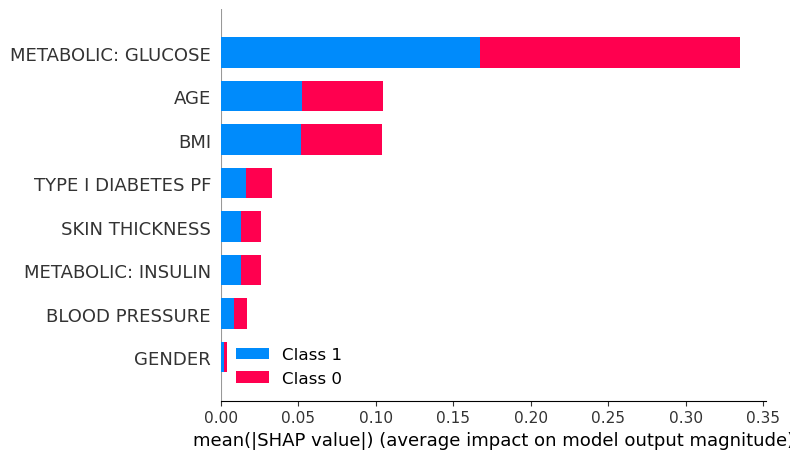

In [42]:
shap.summary_plot(shap_values,X_test)

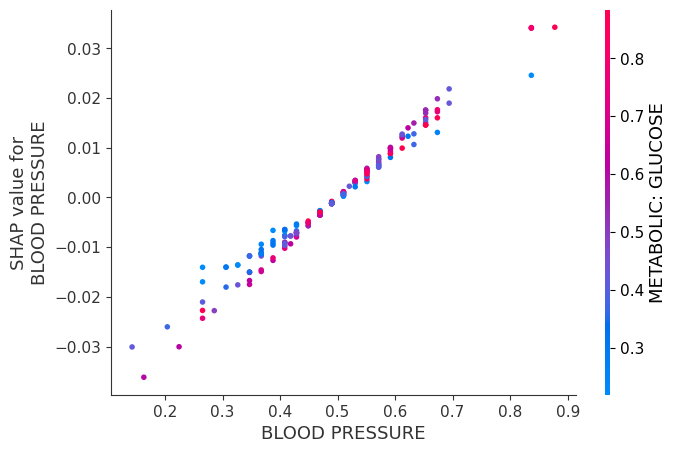

In [43]:
shap.dependence_plot(2,shap_values[0], X_test)

In [44]:
!pip install eli5
import eli5

In [45]:
# Showing the Weight for our model
eli5.show_weights(logit,top=10)

Weight?,Feature
+4.984,x1
+2.672,x5
+1.758,x7
+0.925,x3
+0.808,x6
+0.023,x0
-0.541,x2
-0.750,x4
-4.370,<BIAS>


In [46]:
feature_names = ['GENDER', 'METABOLIC: GLUCOSE', 'BLOOD PRESSURE',
       'SKIN THICKNESS', 'METABOLIC: INSULIN', 'BMI', 'TYPE I DIABETES PF',
       'AGE']

In [47]:
outcome_names = ['Non Diabetes','Diabetes']

In [48]:
# Clearly Define Feature Names
eli5.show_weights(logit,feature_names=feature_names,target_names = outcome_names)

Weight?,Feature
+4.984,METABOLIC: GLUCOSE
+2.672,BMI
+1.758,AGE
+0.925,SKIN THICKNESS
+0.808,TYPE I DIABETES PF
+0.023,GENDER
-0.541,BLOOD PRESSURE
-0.750,METABOLIC: INSULIN
-4.370,<BIAS>


In [49]:
# Show Explaination For A Single Prediction
eli5.show_prediction(logit, X_test.iloc[121],feature_names=feature_names,target_names=outcome_names)

# Using Random Forest Classifier

In [50]:
from sklearn.ensemble import RandomForestClassifier

In [51]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Now, after using the same train/test data, we predict the outcome and test the accuracy

In [52]:
predictions = rf_classifier.predict(X_test)

In [53]:
predictions

array([0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 1])

In [62]:
single_prediction_input = pd.DataFrame(X_test.iloc[123, :]).transpose()
single_prediction = rf_classifier.predict(single_prediction_input)
single_prediction

array([1])

In [63]:
accuracy = accuracy_score(y_test, predictions)

In [64]:
accuracy

0.81

The Random Forest Classifier shoes around a 5% increase in accuracy

We now use SHAP and ELI5 to visualise the results

SHAP:

In [65]:
explainer = shap.Explainer(rf_classifier)
shap_values = explainer.shap_values(X_test)

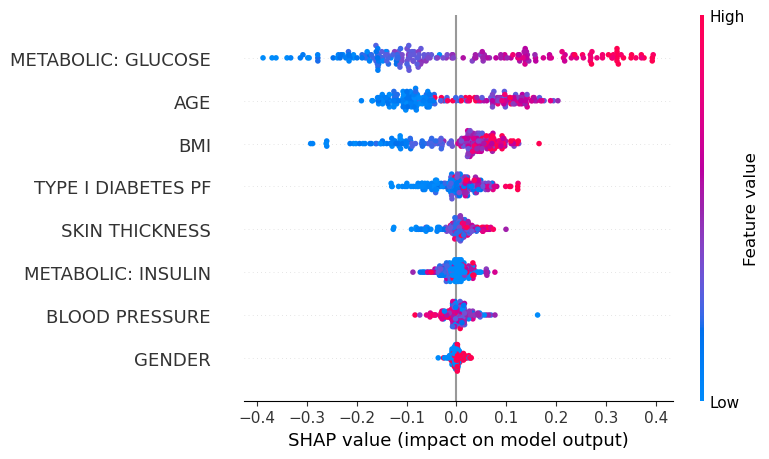

In [66]:
shap.summary_plot(shap_values[1], X_test, feature_names=X_test.columns)

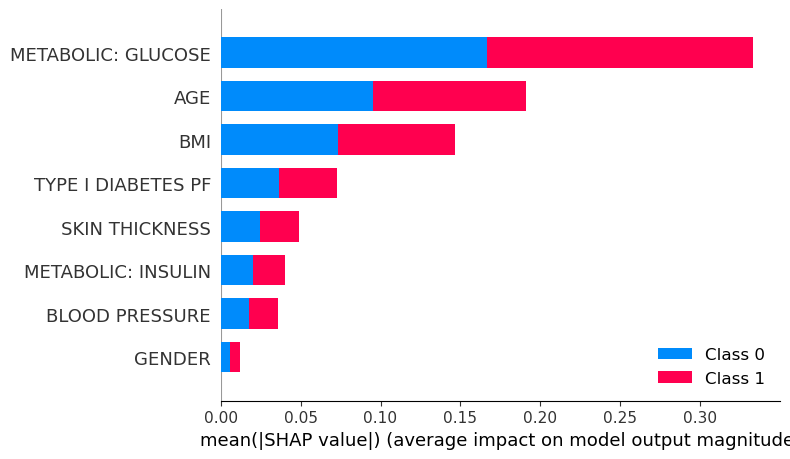

In [67]:
shap.summary_plot(shap_values,X_test)

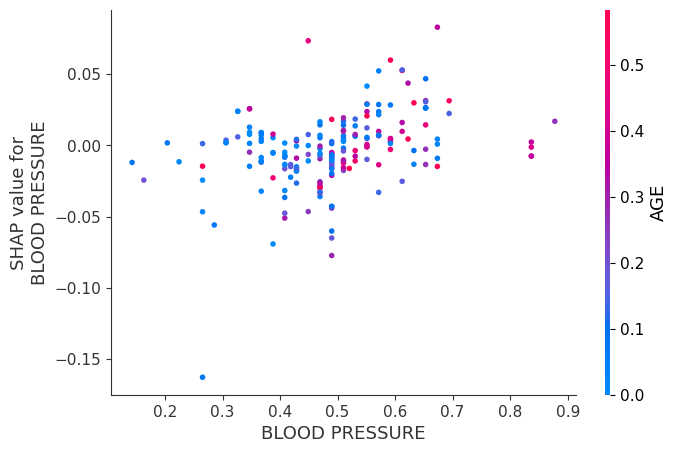

In [68]:
shap.dependence_plot(2,shap_values[0], X_test)

In [69]:
eli5.show_weights(rf_classifier, feature_names=list(X_train.columns), target_names = outcome_names)

Weight,Feature
0.2908 ± 0.1334,METABOLIC: GLUCOSE
0.1743 ± 0.0998,BMI
0.1507 ± 0.0936,AGE
0.1273 ± 0.0630,TYPE I DIABETES PF
0.0899 ± 0.0522,BLOOD PRESSURE
0.0752 ± 0.0525,METABOLIC: INSULIN
0.0750 ± 0.0566,SKIN THICKNESS
0.0168 ± 0.0192,GENDER
